36120 Advanced Machine Learning Application Spring 2023
Assignment 2
Run experiments by Sudarat Sukjaroen StudentID 24667255

# 1. Load and Explore Dataset

Import the pandas, numpy and altair packages

In [3]:
pip install altair

Note: you may need to restart the kernel to use updated packages.


In [33]:
# Solution
import pandas as pd
import numpy as np
import sklearn


Read data from CSV file.

In [120]:
sales_train = pd.read_csv(r'C:\Users\sudar\Desktop\AdvML\AT2\sales_train.csv')
sales_test = pd.read_csv(r'C:\Users\sudar\Desktop\AdvML\AT2\sales_test.csv')
sell_prices = pd.read_csv(r'C:\Users\sudar\Desktop\AdvML\AT2\items_weekly_sell_prices.csv')
calendar = pd.read_csv(r'C:\Users\sudar\Desktop\AdvML\AT2\calendar.csv')
calendar_events = pd.read_csv(r'C:\Users\sudar\Desktop\AdvML\AT2\calendar_events.csv')


# 2. Data exploration

*   Number of sales_train data set = 30,490 (total 1,547 columns) = 47,168,030
*   Number of sales_test data set = 30,490 (total 400 columns) = 12,196,000
*   Number of sell_prices data set = 6,841,121 (total 4 columns) = 27,264,484
*   Number of calendar data set = 1,969 (total 3 columns)
*   Number of calendar_events data set = 167 (total 3 columns)

Check Null value

In [17]:
# Create a list of dataframes
dataframes = [sales_train, sales_test, sell_prices, calendar, calendar_events]

# Iterate through the list of dataframes and check for null values
for i, df in enumerate(dataframes):
    if df.isnull().values.any():
        print(f"DataFrame {i+1} has null values:")
        print(df.isnull().sum())
    else:
        print(f"DataFrame {i+1} has no null values.")

DataFrame 1 has no null values.
DataFrame 2 has no null values.
DataFrame 3 has no null values.
DataFrame 4 has no null values.
DataFrame 5 has no null values.


Check number of records and number of columns

In [18]:
dataframes = [sales_train, sales_test, sell_prices, calendar, calendar_events]

# Iterate through the list of dataframes and print the number of rows and columns
for i, df in enumerate(dataframes):
    num_rows, num_cols = df.shape
    print(f"DataFrame {i+1}:")
    print(f"Number of rows: {num_rows}")
    print(f"Number of columns: {num_cols}\n")

DataFrame 1:
Number of rows: 30490
Number of columns: 1547

DataFrame 2:
Number of rows: 30490
Number of columns: 400

DataFrame 3:
Number of rows: 6841121
Number of columns: 4

DataFrame 4:
Number of rows: 1969
Number of columns: 3

DataFrame 5:
Number of rows: 167
Number of columns: 3



# 3. Data cleaning and Data preparation

Drop duplicated records

In [19]:
# Create a list of dataframes
dataframes = [sales_train, sell_prices, calendar, calendar_events]

# Because of vertical data then can not drop duplicate in sales_test

# Iterate through the list of dataframes and drop duplicate records
for i, df in enumerate(dataframes):
    num_duplicates_before = df.shape[0]
    df.drop_duplicates(inplace=True)
    num_duplicates_after = df.shape[0]

    if num_duplicates_after < num_duplicates_before:
        print(f"Dropped {num_duplicates_before - num_duplicates_after} duplicate records in DataFrame {i+1}.")
    else:
        print(f"No duplicate records found in DataFrame {i+1}.")

No duplicate records found in DataFrame 1.
No duplicate records found in DataFrame 2.
No duplicate records found in DataFrame 3.
No duplicate records found in DataFrame 4.


In [70]:
sales_train.head(10)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1532,d_1533,d_1534,d_1535,d_1536,d_1537,d_1538,d_1539,d_1540,d_1541
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,1,0,1,0,1,0,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,8,2,0,8,2,3,1,1,3,8
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,0,1,3,2,1,1,2,2,3
5,HOBBIES_1_006_CA_1_evaluation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,0,0,1,0,1,0,0,0,1
6,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,15,0,0,...,0,12,14,3,11,0,6,4,2,2
8,HOBBIES_1_009_CA_1_evaluation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,0,7,3,...,2,0,0,0,3,3,2,0,0,0
9,HOBBIES_1_010_CA_1_evaluation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,0,0,1,0,...,0,1,0,0,1,1,0,0,0,0


In [71]:
sales_test.head(10)

,d_1542,d_1543,d_1544,d_1545,d_1546,d_1547,d_1548,d_1549,d_1550,d_1551,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,0,1,0,2,1,0,2,0,1,0,...,2,4,0,0,0,0,3,3,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,1,2,1,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,4,1,0,1,3,5,2,3,0,2,...,1,1,0,4,0,1,3,0,2,6
4,3,0,0,1,1,0,2,0,2,1,...,0,0,0,2,1,0,0,2,1,0
5,2,0,0,0,1,0,0,1,1,3,...,2,1,0,0,1,0,0,5,2,0
6,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
7,4,0,5,14,2,2,10,11,7,30,...,7,0,6,0,15,5,4,1,40,32
8,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9,3,3,0,0,0,1,0,2,1,0,...,0,0,1,0,2,1,1,0,0,1


In [133]:
sell_prices.head(10)

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
5,CA_1,HOBBIES_1_001,11330,8.26
6,CA_1,HOBBIES_1_001,11331,8.26
7,CA_1,HOBBIES_1_001,11332,8.26
8,CA_1,HOBBIES_1_001,11333,8.26
9,CA_1,HOBBIES_1_001,11334,8.26


In [77]:
calendar.head(10)

,date,wm_yr_wk,d
0,2011-01-29,11101,d_1
1,2011-01-30,11101,d_2
2,2011-01-31,11101,d_3
3,2011-02-01,11101,d_4
4,2011-02-02,11101,d_5
5,2011-02-03,11101,d_6
6,2011-02-04,11101,d_7
7,2011-02-05,11102,d_8
8,2011-02-06,11102,d_9
9,2011-02-07,11102,d_10


In [134]:
calendar_events.head(10)

,date,event_name,event_type,event_name_id,event_type_id,day_month
0,2011-02-06,SuperBowl,Sporting,0,0,06-02
1,2011-02-14,ValentinesDay,Cultural,1,1,14-02
2,2011-02-21,PresidentsDay,National,2,2,21-02
3,2011-03-09,LentStart,Religious,3,3,09-03
4,2011-03-16,LentWeek2,Religious,4,3,16-03
5,2011-03-17,StPatricksDay,Cultural,5,1,17-03
6,2011-03-20,Purim End,Religious,6,3,20-03
7,2011-04-24,Easter,Cultural,7,1,24-04
8,2011-04-24,OrthodoxEaster,Religious,8,3,24-04
9,2011-04-26,Pesach End,Religious,9,3,26-04


date	wm_yr_wk	d
29/01/2011	11101	d_1
19/06/2016	11621	d_1969


In [68]:
sell_prices.head(10)

min_wm_yr_wk = sell_prices['wm_yr_wk'].min()
print("Minimum wm_yr_wk value:", min_wm_yr_wk)

max_wm_yr_wk = sell_prices['wm_yr_wk'].max()
print("Maximum wm_yr_wk value:", max_wm_yr_wk)

Minimum wm_yr_wk value: 11101
Maximum wm_yr_wk value: 11621


Create new dataframe from store_id and item_id and map them to be number

In [121]:
store_item_id = sell_prices[['store_id', 'item_id']].drop_duplicates()

store_item_id['store_id_num'], unique_categories = pd.factorize(store_item_id['store_id'])
store_item_id['item_id_num'], unique_categories = pd.factorize(store_item_id['item_id'])

print(store_item_id.head(100))

      store_id        item_id  store_id_num  item_id_num
0         CA_1  HOBBIES_1_001             0            0
154       CA_1  HOBBIES_1_002             0            1
416       CA_1  HOBBIES_1_003             0            2
541       CA_1  HOBBIES_1_004             0            3
818       CA_1  HOBBIES_1_005             0            4
...        ...            ...           ...          ...
22609     CA_1  HOBBIES_1_099             0           95
22891     CA_1  HOBBIES_1_100             0           96
23173     CA_1  HOBBIES_1_102             0           97
23381     CA_1  HOBBIES_1_103             0           98
23663     CA_1  HOBBIES_1_104             0           99

[100 rows x 4 columns]


In [71]:
# Create a list of dataframes
dataframes = [store_item_id]

# Iterate through the list of dataframes and print the number of rows and columns
for i, df in enumerate(dataframes):
    num_rows, num_cols = df.shape
    print(f"DataFrame {i+1}:")
    print(f"Number of rows: {num_rows}")
    print(f"Number of columns: {num_cols}\n")

DataFrame 1:
Number of rows: 30490
Number of columns: 4



In [83]:
calendar_events.head(10)

,date,event_name,event_type
0,2011-02-06,SuperBowl,Sporting
1,2011-02-14,ValentinesDay,Cultural
2,2011-02-21,PresidentsDay,National
3,2011-03-09,LentStart,Religious
4,2011-03-16,LentWeek2,Religious
5,2011-03-17,StPatricksDay,Cultural
6,2011-03-20,Purim End,Religious
7,2011-04-24,Easter,Cultural
8,2011-04-24,OrthodoxEaster,Religious
9,2011-04-26,Pesach End,Religious


Map event_name and event_tyep to be number

In [122]:
calendar_events['event_name_id'], unique_categories = pd.factorize(calendar_events['event_name'])
calendar_events['event_type_id'], unique_categories = pd.factorize(calendar_events['event_type'])

print(calendar_events.head(1000))

           date      event_name event_type  event_name_id  event_type_id
0    2011-02-06       SuperBowl   Sporting              0              0
1    2011-02-14   ValentinesDay   Cultural              1              1
2    2011-02-21   PresidentsDay   National              2              2
3    2011-03-09       LentStart  Religious              3              3
4    2011-03-16       LentWeek2  Religious              4              3
..          ...             ...        ...            ...            ...
162  2016-05-30     MemorialDay   National             12              2
163  2016-06-02  NBAFinalsStart   Sporting             13              0
164  2016-06-07  Ramadan starts  Religious             17              3
165  2016-06-19    Father's day   Cultural             15              1
166  2016-06-19    NBAFinalsEnd   Sporting             14              0

[167 rows x 5 columns]


Feature Engineering

In [123]:
# Concat Sales train and Sales test together
#sales_train = pd.concat([sales_train, sales_test], axis=0, ignore_index=True)

#########################################################################################

# Specify the filter condition
#filter_condition = (sales_train['dept_id'] == 'FOODS_1')
#filter_condition = (sales_train['id'] == 'FOODS_1_001_CA_1_evaluation')

# Apply the filter to select rows that meet the condition
#sales_train = sales_train[filter_condition]

sales_train = sales_train.copy()

#########################################################################################

# Define the ID columns (columns you want to keep as is)
id_columns = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']

# Use pd.melt to transpose the data
transposed_sales_train = pd.melt(sales_train, id_vars=id_columns, var_name='d', value_name='sales')

#########################################################################################

# Merge the filtered sales data with the calendar DataFrame
transposed_sales_train = pd.merge(transposed_sales_train, calendar[['date', 'wm_yr_wk', 'd']], left_on='d', right_on='d')

#########################################################################################

transposed_sales_train = pd.merge(transposed_sales_train, sell_prices, on=['store_id', 'item_id', 'wm_yr_wk'])

# Calculate sales_total by multiplying sales with sell_price
transposed_sales_train['sales_revenue'] = transposed_sales_train['sales'] * transposed_sales_train['sell_price']

#########################################################################################

transposed_sales_train = pd.merge(transposed_sales_train, store_item_id, on=['store_id', 'item_id'], how='left')

######################################################################################### keep dup event

# Merge data with the calendar DataFrame based on the 'date' column
transposed_sales_train = pd.merge(transposed_sales_train, calendar_events[['date', 'event_name','event_name_id', 'event_type', 'event_type_id']], on='date', how='left')

# Fill missing values with -999 for 'event_name', 'event_name_id', 'event_type', and 'event_type_id'
transposed_sales_train['event_name'].fillna('None', inplace=True)
transposed_sales_train['event_name_id'].fillna(999, inplace=True)
transposed_sales_train['event_type'].fillna('None', inplace=True)
transposed_sales_train['event_type_id'].fillna(999, inplace=True)

#########################################################################################

# Count the number of records (rows) and number of columns in the DataFrame
record_count = transposed_sales_train.shape[0]
print("Number of Records:", record_count)

num_columns = transposed_sales_train.shape[1]
print("Number of columns:", num_columns)

#transposed_sales_train.to_csv("transposed_sales_train.csv", index=False)


Number of Records: 34815174
Number of columns: 18


Sumarise sales_revenue group by store_id an item_id and date 34,720,691

In [130]:
import pandas as pd

# Group by 'store_id', 'item_id', and 'date' and sum 'sales_revenue'
grouped_sales = transposed_sales_train.groupby(['store_id', 'item_id', 'date'])['sales_revenue'].sum().reset_index()

# Define the path where you want to save the CSV file
csv_file_path = r'C:\Users\sudar\Desktop\AdvML\AT2\grouped_sales.csv'

# Export the grouped DataFrame to a CSV file
grouped_sales.to_csv(csv_file_path, index=False)

# Print the first 5 rows of the grouped DataFrame
print(grouped_sales.head(5))

# Count the number of records (rows) in the DataFrame
record_count = grouped_sales.shape[0]
print("Number of records:", record_count)

  store_id      item_id        date  sales_revenue
0     CA_1  FOODS_1_001  2011-01-29            6.0
1     CA_1  FOODS_1_001  2011-01-30            0.0
2     CA_1  FOODS_1_001  2011-01-31            0.0
3     CA_1  FOODS_1_001  2011-02-01            2.0
4     CA_1  FOODS_1_001  2011-02-02            8.0
Number of records: 34720691


In [131]:
import pandas as pd

transposed_sales_train['date'] = pd.to_datetime(transposed_sales_train['date'])

# Extract the month and year from the 'date' column and create a new 'month_year' column
transposed_sales_train['month_year'] = transposed_sales_train['date'].dt.strftime('%b-%Y')

# Group by 'store_id', 'item_id', and 'month_year' and sum 'sales_revenue'
grouped_sales = transposed_sales_train.groupby(['state_id', 'cat_id', 'month_year'])['sales_revenue'].sum().reset_index()

# Define the path where you want to save the CSV file
csv_file_path = r'C:\Users\sudar\Desktop\AdvML\AT2\grouped_sales_by_month_year.csv'

# Export the grouped DataFrame to a CSV file
grouped_sales.to_csv(csv_file_path, index=False)

# Print the first 5 rows of the grouped DataFrame
print(grouped_sales.head(5))

# Count the number of records (rows) in the DataFrame
record_count = grouped_sales.shape[0]
print("Number of records:", record_count)


  state_id cat_id month_year  sales_revenue
0       CA  FOODS   Apr-2011      544672.35
1       CA  FOODS   Apr-2012      742857.60
2       CA  FOODS   Apr-2013      689067.54
3       CA  FOODS   Apr-2014      847585.73
4       CA  FOODS   Apr-2015      475873.54
Number of records: 468


In [132]:
import pandas as pd

# Group by 'dept_id', 'cat_id', 'store_id', 'state_id', and count unique 'item_id'
item_count_by_group = sales_train.groupby(['dept_id', 'cat_id', 'store_id', 'state_id'])['item_id'].nunique().reset_index()

# Define the path where you want to save the CSV file
csv_file_path = r'C:\Users\sudar\Desktop\AdvML\AT2\item_count_by_group.csv'

# Export the result to a CSV file
item_count_by_group.to_csv(csv_file_path, index=False)

# Print the resulting DataFrame
print(item_count_by_group)


        dept_id     cat_id store_id state_id  item_id
0       FOODS_1      FOODS     CA_1       CA      216
1       FOODS_1      FOODS     CA_2       CA      216
2       FOODS_1      FOODS     CA_3       CA      216
3       FOODS_1      FOODS     CA_4       CA      216
4       FOODS_1      FOODS     TX_1       TX      216
..          ...        ...      ...      ...      ...
65  HOUSEHOLD_2  HOUSEHOLD     TX_2       TX      515
66  HOUSEHOLD_2  HOUSEHOLD     TX_3       TX      515
67  HOUSEHOLD_2  HOUSEHOLD     WI_1       WI      515
68  HOUSEHOLD_2  HOUSEHOLD     WI_2       WI      515
69  HOUSEHOLD_2  HOUSEHOLD     WI_3       WI      515

[70 rows x 5 columns]


In [97]:
transposed_sales_train['date'] = pd.to_datetime(transposed_sales_train['date'])

# Find the minimum and maximum dates
min_date = transposed_sales_train['date'].min()
max_date = transposed_sales_train['date'].max()

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)


Minimum Date: 2011-01-29 00:00:00
Maximum Date: 2015-04-18 00:00:00


# 4.2 Forecasting Model

Forecasting model : SARIMA

In [87]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


# Set 'date' as the index and convert it to a datetime type
transposed_sales_train['date'] = pd.to_datetime(transposed_sales_train['date'])
transposed_sales_train.set_index('date', inplace=True)


# Aggregate sales revenue at the daily level for each store and item
daily_sales_revenue = transposed_sales_train.groupby(['store_id', 'item_id', 'date'])['sales_revenue'].sum().reset_index()


# Reset the index to have 'store_id', 'item_id', and 'date' as columns
daily_sales_revenue.reset_index(inplace=True)


# Define SARIMA order (p, d, q) and seasonal order (P, D, Q, s)
p, d, q = 1, 1, 1  # Autoregressive, Integrated, Moving Average order
P, D, Q, s = 1, 1, 1, 7  # Seasonal Autoregressive, Seasonal Integrated, Seasonal Moving Average, Seasonal period


# Create a DataFrame containing 'store_id' and 'item_id' for each unique combination
store_item_combinations = daily_sales_revenue[['store_id', 'item_id']].drop_duplicates()


# Create an empty list to store forecast DataFrames
forecast_results_list = []


# Iterate over each unique combination of 'store_id' and 'item_id'
for _, row in store_item_combinations.iterrows():
    store_id, item_id = row['store_id'], row['item_id']
    
    # Filter data for the current 'store_id' and 'item_id'
    store_item_data = daily_sales_revenue[
        (daily_sales_revenue['store_id'] == store_id) & (daily_sales_revenue['item_id'] == item_id)
    ]
    
    # Create SARIMA model for the current combination
    sarima_model = sm.tsa.SARIMAX(
        store_item_data['sales_revenue'],
        order=(p, d, q),
        seasonal_order=(P, D, Q, s)
    )
    
    # Fit the SARIMA model to the data
    sarima_results = sarima_model.fit()
    
    # Forecast sales revenue for the next 7 days
    forecast_steps = 7
    forecast = sarima_results.get_forecast(steps=forecast_steps)
    
    # Extract the forecasted values and add them to the list
    forecasted_values = forecast.predicted_mean
    
    # Create a DataFrame with the forecasted sales
    forecast_data = pd.DataFrame({'forecasted_sales': forecasted_values})
    
    # Create a date range for the next 7 days starting from the last date in the historical data
    last_date = store_item_data['date'].max()
    date_range = pd.date_range(start=last_date + pd.DateOffset(1), periods=forecast_steps, freq='D')
    
    # Add the 'date' column to the forecasted DataFrame
    forecast_data['date'] = date_range
    
    # Append the 'store_id' and 'item_id' to the DataFrame
    forecast_data['store_id'] = store_id
    forecast_data['item_id'] = item_id
    
    # Append the forecast result DataFrame to the list
    forecast_results_list.append(forecast_data)

    
# Concatenate all the forecast DataFrames into a single DataFrame
forecast_results_with_ids = pd.concat(forecast_results_list, ignore_index=True)


# Reorder the columns in the DataFrame
forecast_results_with_ids = forecast_results_with_ids[['store_id', 'item_id', 'date', 'forecasted_sales']]


# Print the forecasted values for the next 7 days with reordered columns
print("Forecasted Sales Revenue for the Next 7 Days:")
print(forecast_results_with_ids)


Forecasted Sales Revenue for the Next 7 Days:
  store_id      item_id       date  forecasted_sales
0     CA_1  FOODS_1_001 2015-04-19          1.588005
1     CA_1  FOODS_1_001 2015-04-20          1.017585
2     CA_1  FOODS_1_001 2015-04-21          0.941780
3     CA_1  FOODS_1_001 2015-04-22          1.177714
4     CA_1  FOODS_1_001 2015-04-23          0.880150
5     CA_1  FOODS_1_001 2015-04-24          1.678179
6     CA_1  FOODS_1_001 2015-04-25          1.924820


In [ ]:
Forecasting model : SARIMA (Graph)

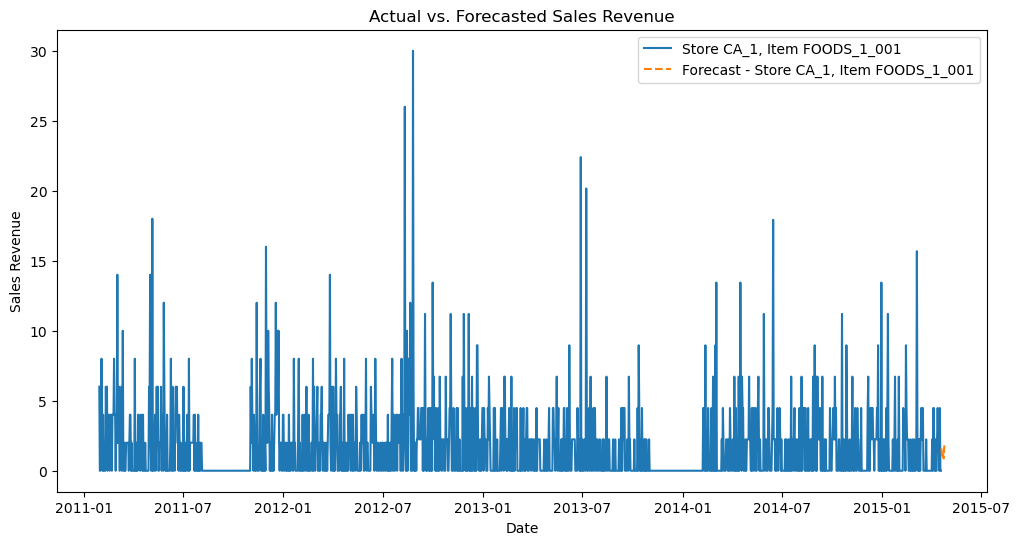

In [88]:
fig, ax = plt.subplots(figsize=(12, 6))

# Iterate over each unique combination of 'store_id' and 'item_id'
for _, row in store_item_combinations.iterrows():
    store_id, item_id = row['store_id'], row['item_id']
    
    # Filter data for the current 'store_id' and 'item_id'
    store_item_data = daily_sales_revenue[
        (daily_sales_revenue['store_id'] == store_id) & (daily_sales_revenue['item_id'] == item_id)
    ]
    
    # Plot the actual sales revenue
    ax.plot(store_item_data['date'], store_item_data['sales_revenue'], label=f'Store {store_id}, Item {item_id}')
    
    # Create SARIMA model for the current combination
    sarima_model = sm.tsa.SARIMAX(
        store_item_data['sales_revenue'],
        order=(p, d, q),
        seasonal_order=(P, D, Q, s)
    )
    
    # Fit the SARIMA model to the data
    sarima_results = sarima_model.fit()
    
    # Forecast sales revenue for the next 7 days
    forecast_steps = 7
    forecast = sarima_results.get_forecast(steps=forecast_steps)
    
    # Extract the forecasted values and add them to the plot
    forecasted_values = forecast.predicted_mean
    last_date = store_item_data['date'].max()
    date_range = pd.date_range(start=last_date + pd.DateOffset(1), periods=forecast_steps, freq='D')
    
    ax.plot(date_range, forecasted_values, linestyle='--', label=f'Forecast - Store {store_id}, Item {item_id}')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Sales Revenue')
ax.set_title('Actual vs. Forecasted Sales Revenue')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

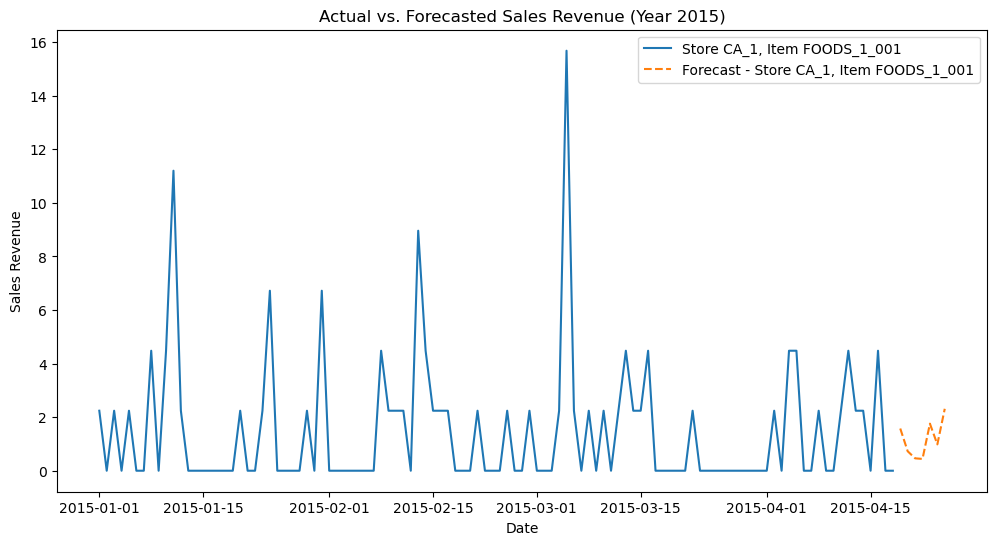

In [91]:
fig, ax = plt.subplots(figsize=(12, 6))

# Iterate over each unique combination of 'store_id' and 'item_id'
for _, row in store_item_combinations.iterrows():
    store_id, item_id = row['store_id'], row['item_id']
    
    # Filter data for the current 'store_id' and 'item_id' and for the year 2015
    store_item_data = daily_sales_revenue[
        (daily_sales_revenue['store_id'] == store_id) & 
        (daily_sales_revenue['item_id'] == item_id) & 
        (daily_sales_revenue['date'].dt.year == 2015)  # Filter for 2015
    ]
    
    # Set 'date' as the datetime index with a daily frequency using .loc
    store_item_data.loc[:, 'date'] = pd.to_datetime(store_item_data['date'], format='%Y-%m-%d')
    store_item_data.set_index('date', inplace=True)
    store_item_data = store_item_data.asfreq('D')  # Set the frequency to 'D' for daily data
    
    # Plot the actual sales revenue
    ax.plot(store_item_data.index, store_item_data['sales_revenue'], label=f'Store {store_id}, Item {item_id}')
    
    # Create SARIMA model for the current combination
    sarima_model = sm.tsa.SARIMAX(
        store_item_data['sales_revenue'],
        order=(p, d, q),
        seasonal_order=(P, D, Q, s)
    )
    
    # Fit the SARIMA model to the data
    sarima_results = sarima_model.fit()
    
    # Forecast sales revenue for the next 7 days
    forecast_steps = 7
    forecast = sarima_results.get_forecast(steps=forecast_steps)
    
    # Extract the forecasted values and add them to the plot
    forecasted_values = forecast.predicted_mean
    last_date = store_item_data.index.max()
    date_range = pd.date_range(start=last_date + pd.DateOffset(1), periods=forecast_steps, freq='D')
    
    ax.plot(date_range, forecasted_values, linestyle='--', label=f'Forecast - Store {store_id}, Item {item_id}')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Sales Revenue')
ax.set_title('Actual vs. Forecasted Sales Revenue (Year 2015)')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()
